<a href="https://colab.research.google.com/github/rafaela-arias/conversor-alura/blob/main/TA047R_TP1_GRUPO03_ENTREGA_EJ4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grupo 3 - Ejercicio 4: *Agrupamiento (Clustering)*
**Objetivo:** analizar si es posible agrupar los datos de un conjunto de datos que contiene información sobre algunos tracks (canciones) de Spotify, en función de algún criterio, mediante el algoritmo K-Means.


**Integrantes:**
- ARIAS, Rafaela Pilar. 112272. rparias@fi.uba.ar.
- BARCALA ROCA, Ramiro. 112478. rbarcala@fi.uba.ar.
- LEMA, Mora. 111831. molema@fi.uba.ar.
- IENCO, Lara Eliana. 111921. lienco@fi.uba.ar.
___

####Bibliografía:


##Inicialización del entorno

In [173]:
import pandas as pd #Manipulación y análisis de datos
import seaborn as sns
import matplotlib.pyplot as plt
!pip install tabulate
from tabulate import tabulate

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans

from sklearn.manifold import TSNE

from sklearn.decomposition import PCA

In [174]:
!gdown 1hUQM0DIbP41STW2Mhk5_zk1fpYD0y4I_

Downloading...
From: https://drive.google.com/uc?id=1hUQM0DIbP41STW2Mhk5_zk1fpYD0y4I_
To: /content/playlist_spotify.csv
100% 54.4k/54.4k [00:00<00:00, 108MB/s]


##Análisis exploratorio

In [175]:
data =pd.read_csv('playlist_spotify.csv')

In [176]:
shape = data.shape
print("Filas: %d\nColumnas: %d" % (shape[0], shape[1]))

Filas: 750
Columnas: 13


In [177]:
data

acousticness  danceability  duration  energy  instrumentalness  key  \
0        0.713000         0.514    100125   0.521          0.816000    8   
1        0.192000         0.714    207019   0.614          0.000000    4   
2        0.333000         0.630    216200   0.455          0.000004    5   
3        0.601000         0.810    136413   0.221          0.210000    5   
4        0.883000         0.465    181440   0.459          0.000173    6   
..            ...           ...       ...     ...               ...  ...   
745      0.000175         0.374    333827   0.943          0.000156    6   
746      0.001970         0.487    213000   0.867          0.006020   10   
747      0.916000         0.605    125867   0.314          0.000000    0   
748      0.168000         0.700    249493   0.823          0.000028    3   
749      0.015500         0.477    276720   0.776          0.003140    1   

     liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0      0.1120   -14.835     0       0.0444  119.879               4    0.143  
1      0.2630    -6.935     1       0.0319  123.969               4    0.582  
2      0.1270    -9.290     1       0.0292  139.931               4    0.199  
3      0.1840   -11.005     1       0.0429  109.960               4    0.798  
4      0.0692    -8.137     0       0.0351   90.807               4    0.288  
..        ...       ...   ...          ...      ...             ...      ...  
745    0.1250    -4.108     0       0.0556  112.084               4    0.338  
746    0.0968    -3.293     0       0.0543  160.048               4    0.403  
747    0.3590    -7.631     1       0.0327  138.148               4    0.836  
748    0.1220    -6.892     1       0.0373  144.060               4    0.745  
749    0.2030    -5.056     1       0.0349  131.004               4    0.429  

[750 rows x 13 columns]

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 76.3 KB


| Variable           | Descripción |
|--------------------|-------------|
| `acousticness`     | Medida de confianza sobre si la pista es acústica. Valores entre 0.0 y 1.0. |
| `danceability`     | Qué tan adecuada es la pista para bailar, según su ritmo, tempo, estabilidad, etc. |
| `duration`     | Duración de la pista en milisegundos. |
| `energy`           | Nivel de intensidad y actividad percibida en la pista. Entre 0.0 y 1.0. |
| `instrumentalness` | Predice si la pista no tiene voces. Valores cercanos a 1.0 indican que es instrumental. |
| `key`              | Tono en el que está la canción, como número entero (por ejemplo, 0 = C, 1 = C#/Db, etc.). -1 si no se detecta. |
| `liveness`         | Estima si hay presencia de público. Valores altos indican que puede ser una grabación en vivo. |
| `loudness`         | Volumen promedio de la pista en decibelios (dB). Normalmente valores negativos. |
| `mode`             | Modalidad de la escala: 1 es mayor, 0 es menor. |
| `speechiness`      | Mide la presencia de palabras habladas. Más cerca de 1.0 = más hablada. |
| `tempo`            | Tempo estimado de la pista en BPM (pulsos por minuto). |
| `time_signature`   | Número estimado de tiempos por compás. |
| `valence`          | Qué tan positiva o alegre suena la pista. Valores altos = más feliz. |


###**Análisis de las variables**
Podemos analizar las variables clasificándolas como:

- **Cuantitativas (numéricas):** continuas y discretas.

- **Cualitativas (categóricas):** nominales y ordinales.

**CUANTITATIVAS:**

**CONTINUAS**

- **acousticness:** Medida de confianza sobre si la pista es acústica. Valores entre 0.0 y 1.0.
- **danceability:** Qué tan adecuada es la pista para bailar, según su ritmo, tempo, estabilidad, etc.
- **duration:** Duración de la pista en milisegundos.
- **energy:** Nivel de intensidad y actividad percibida en la pista. Entre 0.0 y 1.0.
- **instrumentalness:** Predice si la pista no tiene voces. Valores cercanos a 1.0 indican que es instrumental.
-**liveness:** Estima si hay presencia de público. Valores altos indican que puede ser una grabación en vivo.
- **loudness:** Volumen promedio de la pista en decibelios (dB). Normalmente valores negativos.
- **speechiness:** Mide la presencia de palabras habladas. Más cerca de 1.0 = más hablada.
- **tempo:** Tempo estimado de la pista en BPM (pulsos por minuto).
- **valence:** Qué tan positiva o alegre suena la pista. Valores altos = más feliz.

**DISCRETAS:**
- **time_signature:** Número estimado de tiempos por compás.

In [179]:
variables_cuantitativas = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'liveness', 'loudness',
                           'speechiness', 'tempo', 'valence', 'time_signature']


#Tomamos sus medidas de resumen
cuantitativas = data[variables_cuantitativas].describe()

#Calculamos la moda y la agregamos como fila ya que describe no la proporciona
moda = data[variables_cuantitativas].mode().iloc[0]
cuantitativas.loc['moda'] = moda

#Mostramos el DataFrame con display para que se vea como una tabla
display(cuantitativas.T)

count           mean           std           min  \
acousticness      750.0       0.357394      0.338405      0.000001   
danceability      750.0       0.596439      0.172036      0.107000   
duration          750.0  220112.733333  65587.690483  33840.000000   
energy            750.0       0.594188      0.253301      0.009250   
instrumentalness  750.0       0.100245      0.259921      0.000000   
liveness          750.0       0.203376      0.177609      0.024000   
loudness          750.0      -8.509339      5.039488    -29.601000   
speechiness       750.0       0.098966      0.104715      0.023400   
tempo             750.0     120.405761     28.378116     55.747000   
valence           750.0       0.497321      0.239615      0.033200   
time_signature    750.0       3.902667      0.400091      1.000000   

                           25%           50%            75%         max  \
acousticness           0.03715       0.24450       0.678500       0.994   
danceability           0.48000       0.60600       0.715750       0.986   
duration          185490.25000  215108.50000  244236.750000  675360.000   
energy                 0.42325       0.63150       0.804750       0.995   
instrumentalness       0.00000       0.00001       0.002245       0.967   
liveness               0.09455       0.12900       0.264750       0.979   
loudness             -10.17350      -7.27000      -5.097750      -0.533   
speechiness            0.03590       0.04875       0.113000       0.721   
tempo                 98.99800     120.10450     138.074750     204.162   
valence                0.29700       0.48300       0.684500       0.975   
time_signature         4.00000       4.00000       4.000000       5.000   

                         moda  
acousticness           0.9920  
danceability           0.5250  
duration          213440.0000  
energy                 0.6660  
instrumentalness       0.0000  
liveness               0.1020  
loudness              -7.2730  
speechiness            0.0349  
tempo                 89.0190  
valence                0.1990  
time_signature         4.0000

**CUALITATIVAS:**

**NOMINALES:**
- **mode:** (binaria) Modalidad de la escala: 1 es mayor, 0 es menor.


**ORDINALES:**
- **key:** Tono en el que está la canción, como número entero (por ejemplo, 0 = C, 1 = C#/Db, etc.). -1 si no se detecta.

In [180]:
variables_cualitativas = ['mode', 'key']
valores_unicos_lista = []

#Recorremos cada columna cualitativa y obtenemos sus valores únicos
for col in variables_cualitativas:
    valores_unicos = ", ".join(map(str, data[col].unique()))  #Convierte valores a string y une con ", "
    valores_unicos_lista.append(valores_unicos)

#Creamos un DataFrame con formato más limpio
data_cualitativas = pd.DataFrame({'Columna': variables_cualitativas, 'Valores Únicos': valores_unicos_lista})
display(data_cualitativas) #Mostrar la tabla

Columna                        Valores Únicos
0    mode                                  0, 1
1     key  8, 4, 5, 6, 9, 1, 0, 2, 7, 11, 3, 10

## Datos faltantes

In [181]:
print("Cantidad total de NaN en el dataset:", data.isnull().sum().sum())
if(data.isnull().sum().sum()) == 0:
  print("No hay datos faltantes!")

Cantidad total de NaN en el dataset: 0
No hay datos faltantes!


¡No hay valores nulos en el dataset! Por lo que no imputamos por nada.

## Outliers

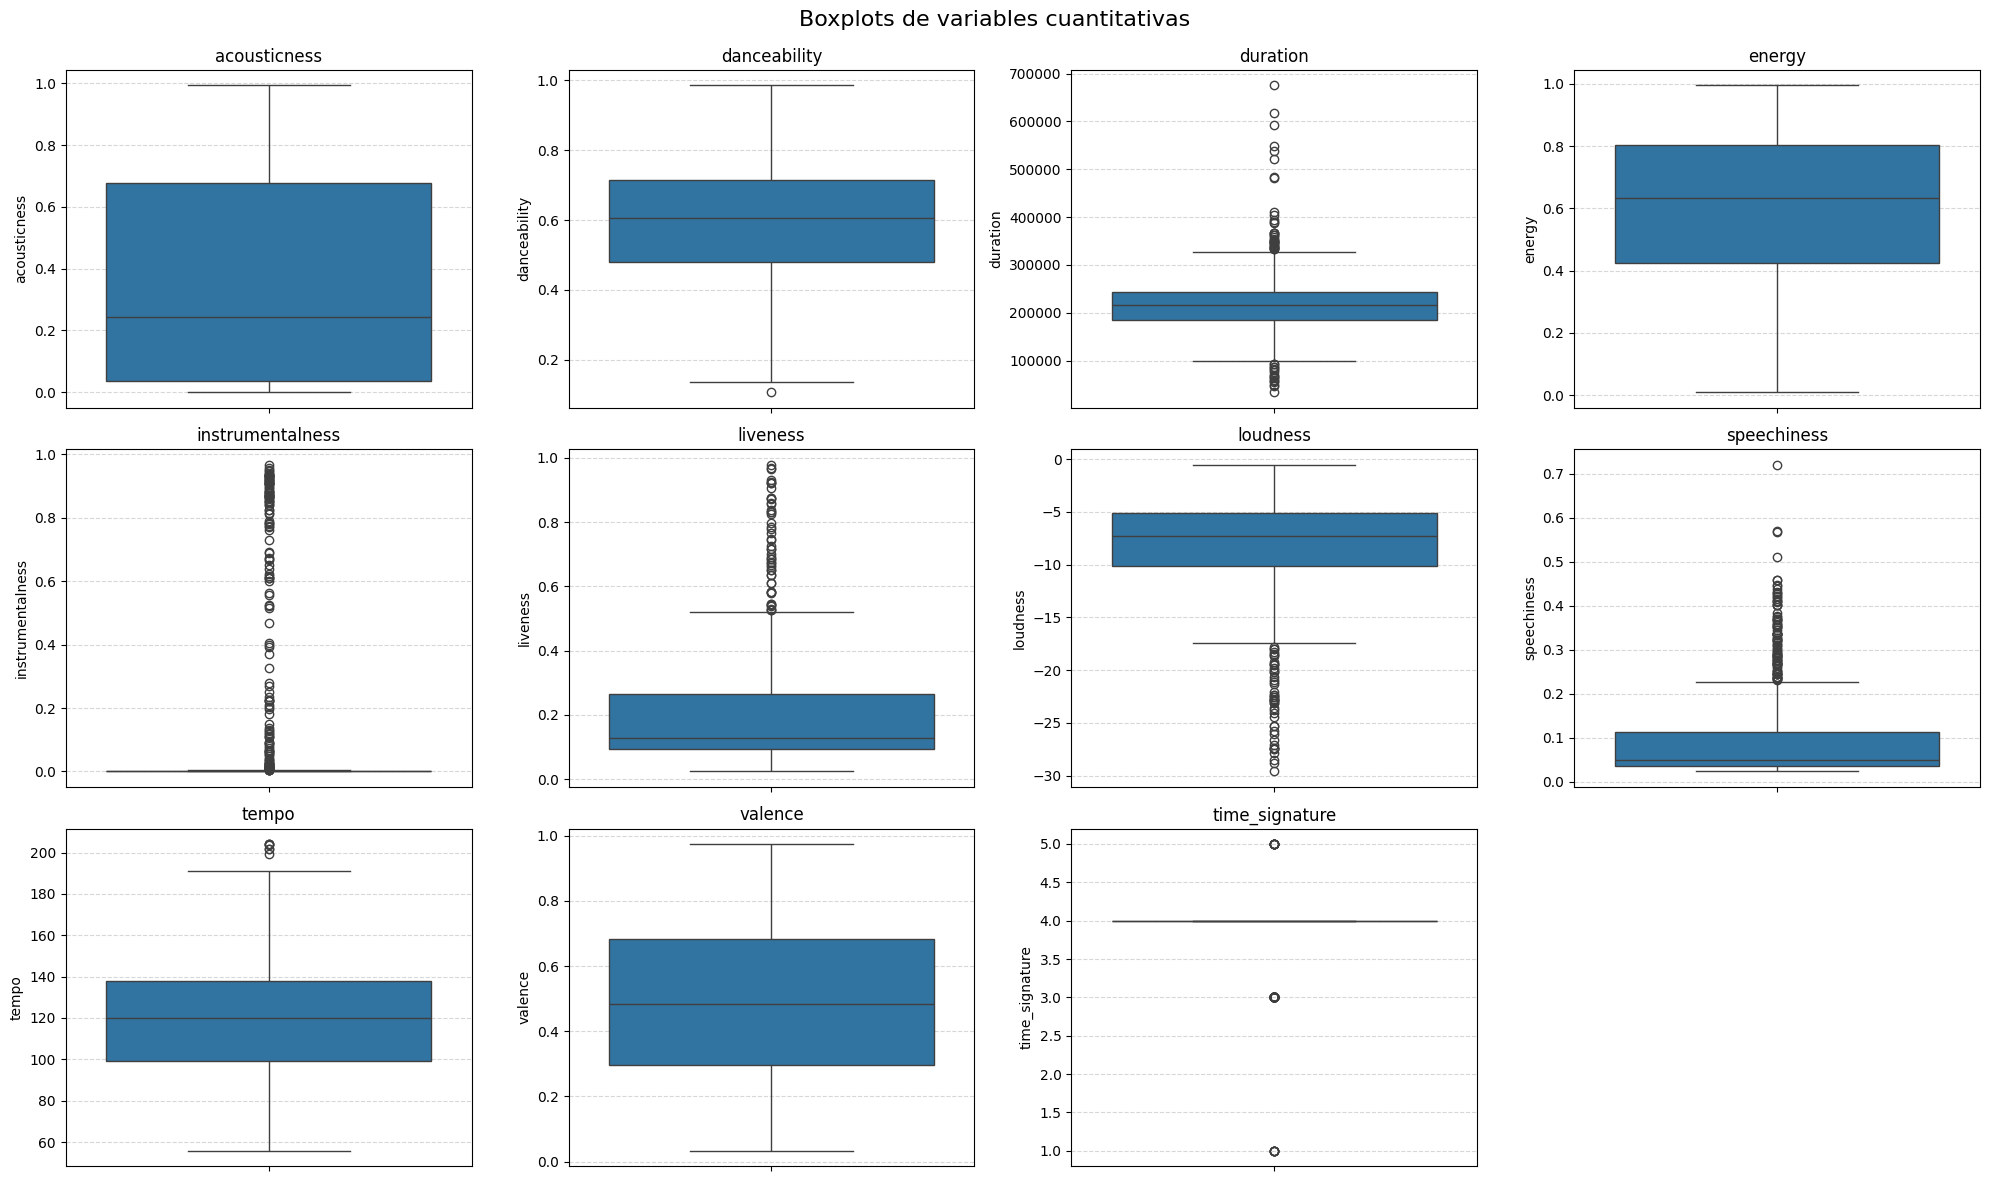

In [182]:
#Boxplots individuales por variable cuantitativa

n = len(variables_cuantitativas)
cols = 4  #cantidad de columnas que querés en el grid
rows = -(-n // cols)  #división entera hacia arriba

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(variables_cuantitativas ):
    sns.boxplot(data=data, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Boxplots de variables cuantitativas', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

En general, observamos que no hay muchos valores atípicos en el Dataset, pues el instrumentalness, el liveness o el speechiness pueden tener esos valores que se marcan como outliers en los gráficos. time_signature es discreta así que también puede tomar dichos valores. La única variable a la que podemos cuestionar es a duration, pues hay pistas entre 400000 y 700000 ms, lo que equivale a 6.6667 minutos y a 11.6667 minutos respectivamente. Estos valores pueden ser demasiado para canciones de Spotify, pero también podrían ser válidos.

Por lo tanto, optamos por no imputar ni filtrar valores atípicos.

## Clustering

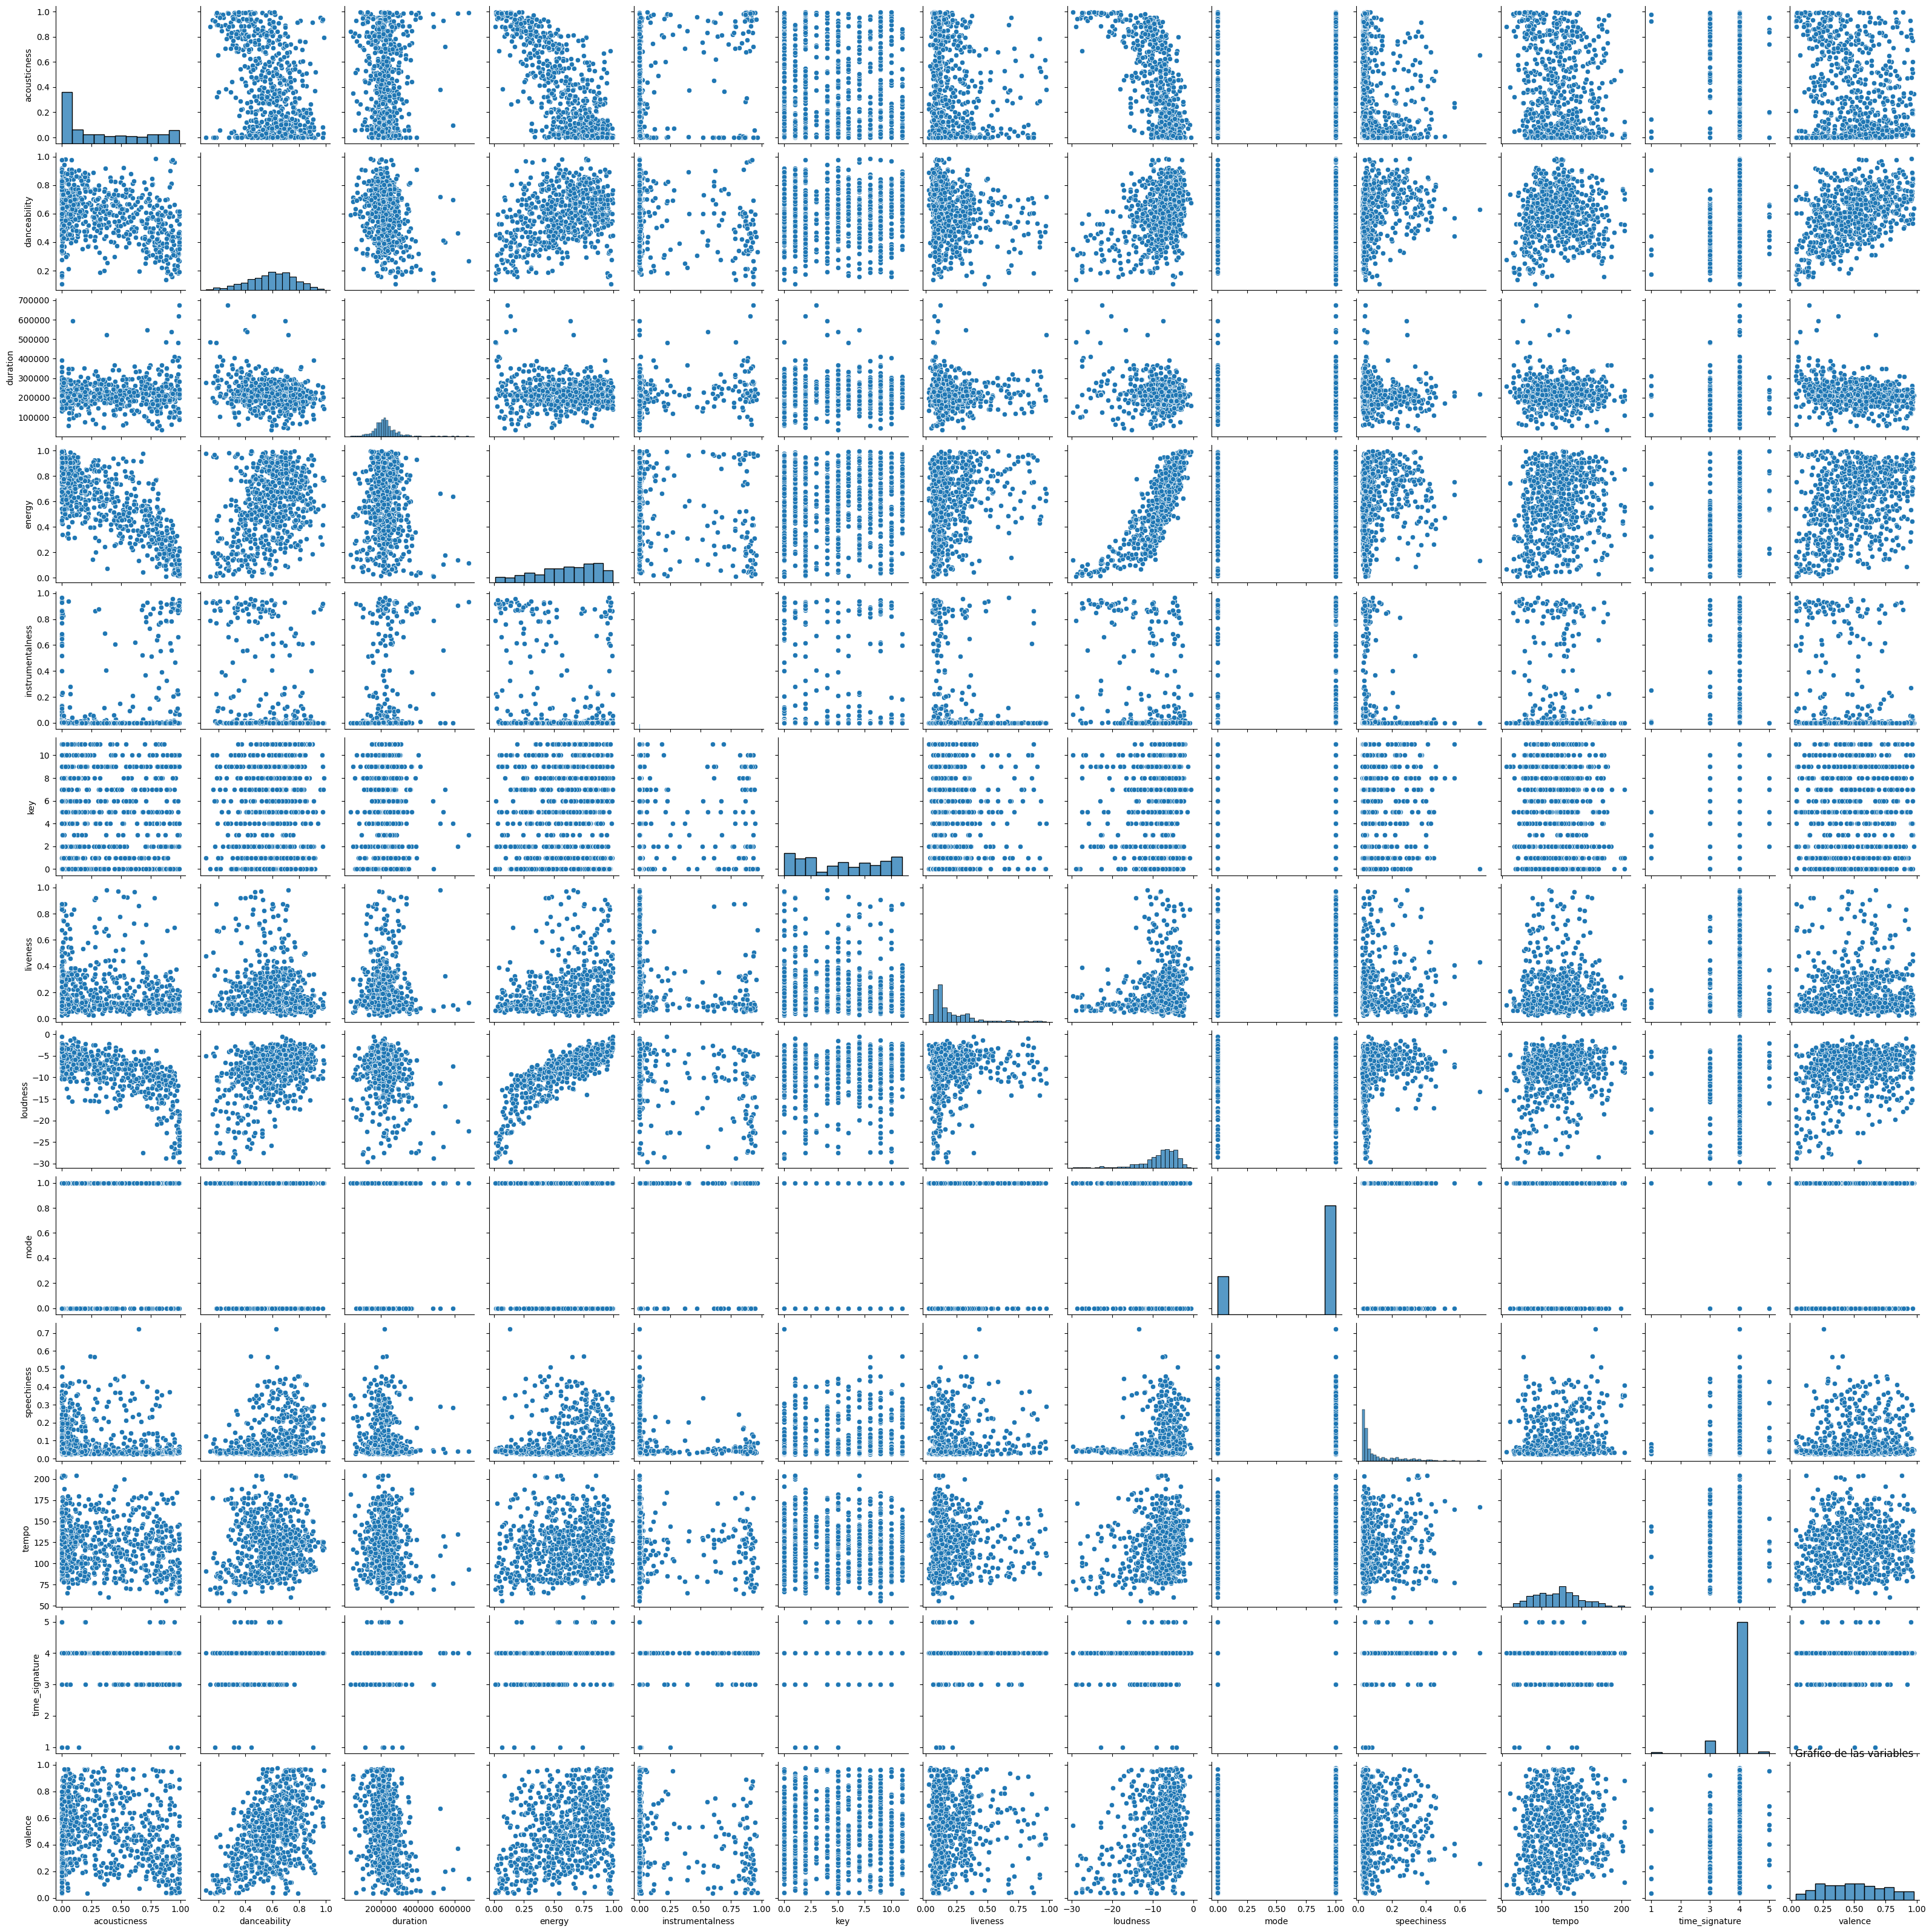

In [183]:
#Gráfico de todas las variables del dataset
#Diagonal --> histograma para ver la distribución de cada variable
#Matrices triangulares --> scatterplots comparando cada par de variables
sns.pairplot(data)
plt.title("Gráfico de las variables")
plt.show()

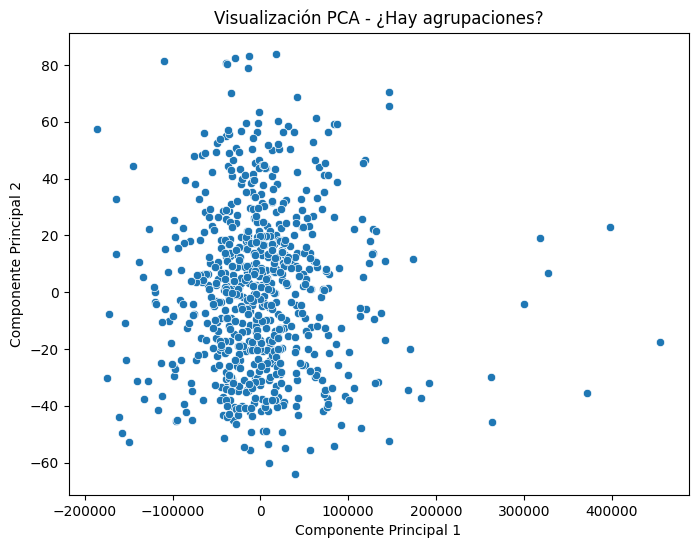

In [184]:
#Análisis de Componentes Principales --> Probamos con PCA para ver agrupaciones (lineal)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1])
plt.title("Visualización PCA - ¿Hay agrupaciones?")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

Con este grafico con PCA no podemos ver si hay agrupaciones por lo que decidimos probar con t-SNE.

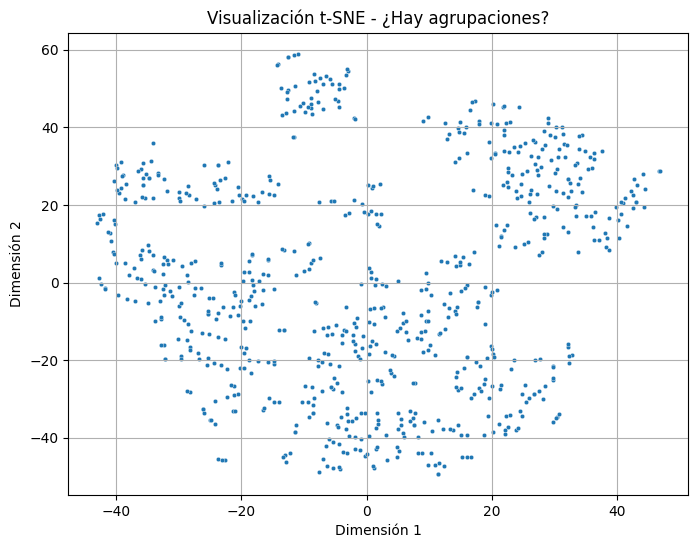

In [185]:
#Probamos con t-SNE t-Distributed Stochastic Neighbor Embedding (no lineal)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

#Pipeline de t-SNE sobre "data" (normalizamos!)
tsne = make_pipeline(StandardScaler(), TSNE(n_components=2, perplexity=15, random_state=42))
data_tsne = tsne.fit_transform(data)

#Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(x=data_tsne[:,0], y=data_tsne[:,1], s=10)
plt.title("Visualización t-SNE - ¿Hay agrupaciones?")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(True)
plt.show()


Aca se podrian llegar a ver mas claramente las agrupaciones.

A simple vista, se pueden distinguir posibles agrupamientos, aunque algunos se superponen. Esto sugiere que K-Means podría encontrar cierta estructura, por lo que lo aplicamos:

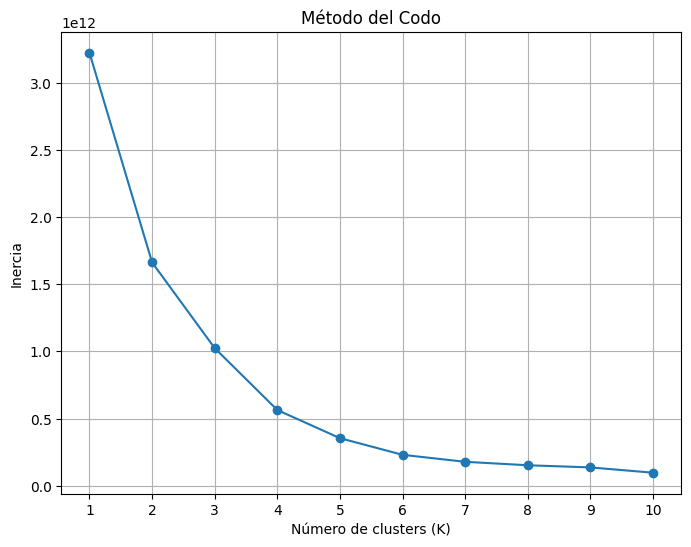

In [186]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inercias = [] #medida de qué tan compactos son los clusters
k_range = range(1, 11) #nro de clusters a probar

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inercias.append(kmeans.inertia_)

#Gráfico del codo
plt.figure(figsize=(8,6))
plt.plot(k_range, inercias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Observando el gráfico, estimamos que 4, 5 o 6 clusteres puede ser una buena cantidad de grupos.

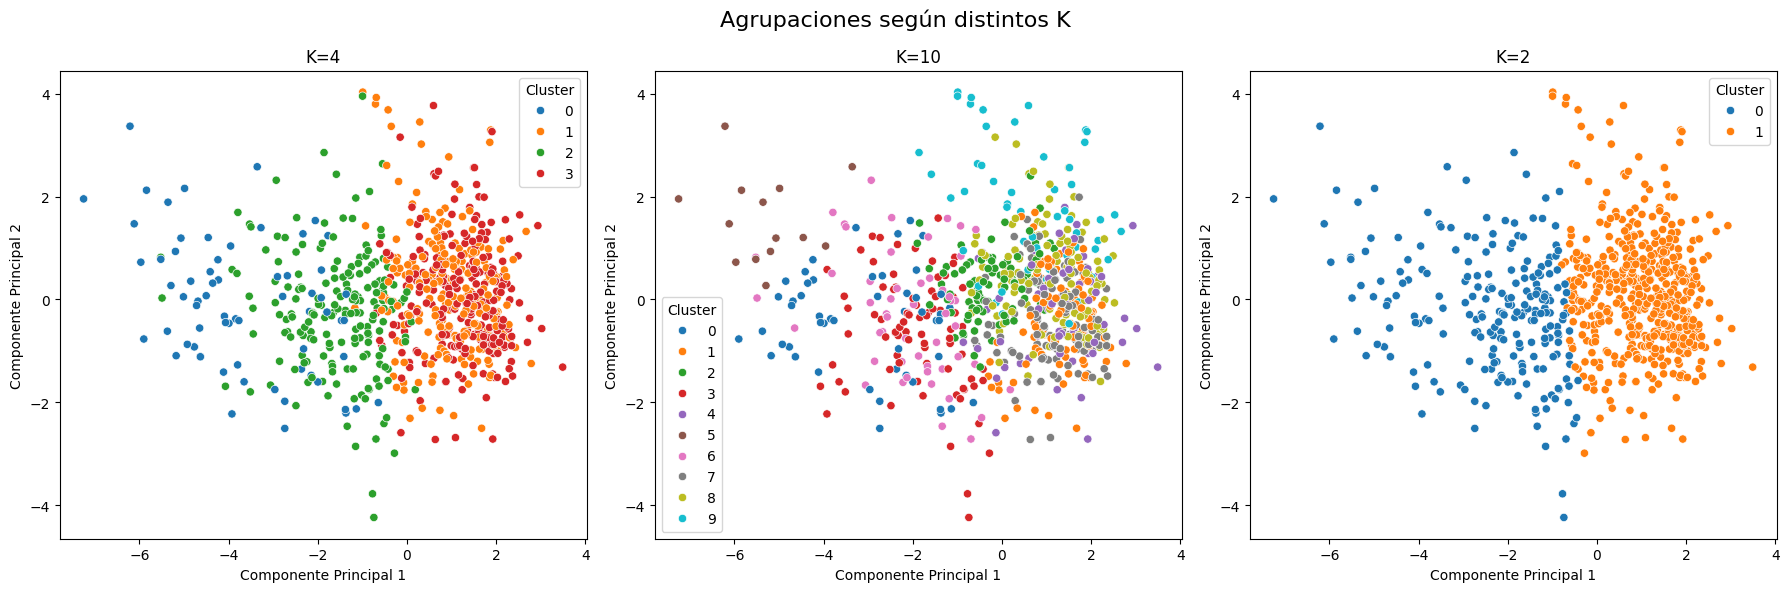

In [187]:
#Análisis de clustering con K-Means usando tres k distintos

#Estandarizamos los datos antes de aplicar KMeans
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#Aplicamos KMeans con K=4
kmeans1 = KMeans(n_clusters=4, random_state=42)
clusters1 = kmeans1.fit_predict(data_scaled)

#Aplicamos KMeans con K=10
kmeans2 = KMeans(n_clusters=10, random_state=42)
clusters2 = kmeans2.fit_predict(data_scaled)

#Aplicamos KMeans con K=2
kmeans3 = KMeans(n_clusters=2, random_state=42)
clusters3 = kmeans3.fit_predict(data_scaled)

#Agregamos los clusters como nueva columna para análisis posterior
data['cluster_k=4'] = clusters1
data['cluster_k=10'] = clusters2
data['cluster_k=2'] = clusters3

#Visualización con PCA (para ver en 2D)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

#Configuramos la figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas, tamaño grande

#Primer gráfico: clusters1
sns.scatterplot(ax=axes[0], x=data_pca[:,0], y=data_pca[:,1], hue=clusters1, palette="tab10")
axes[0].set_title("K=4")
axes[0].set_xlabel("Componente Principal 1")
axes[0].set_ylabel("Componente Principal 2")
axes[0].legend(title="Cluster")

#Segundo gráfico: clusters2
sns.scatterplot(ax=axes[1], x=data_pca[:,0], y=data_pca[:,1], hue=clusters2, palette="tab10")
axes[1].set_title("K=10")
axes[1].set_xlabel("Componente Principal 1")
axes[1].set_ylabel("Componente Principal 2")
axes[1].legend(title="Cluster")

#Tercer gráfico: clusters3
sns.scatterplot(ax=axes[2], x=data_pca[:,0], y=data_pca[:,1], hue=clusters3, palette="tab10")
axes[2].set_title("K=2")
axes[2].set_xlabel("Componente Principal 1")
axes[2].set_ylabel("Componente Principal 2")
axes[2].legend(title="Cluster")

#Ajustamos bien los espacios
fig.suptitle("Agrupaciones según distintos K", fontsize=16)
plt.tight_layout()
plt.show()

### Silhouette Score

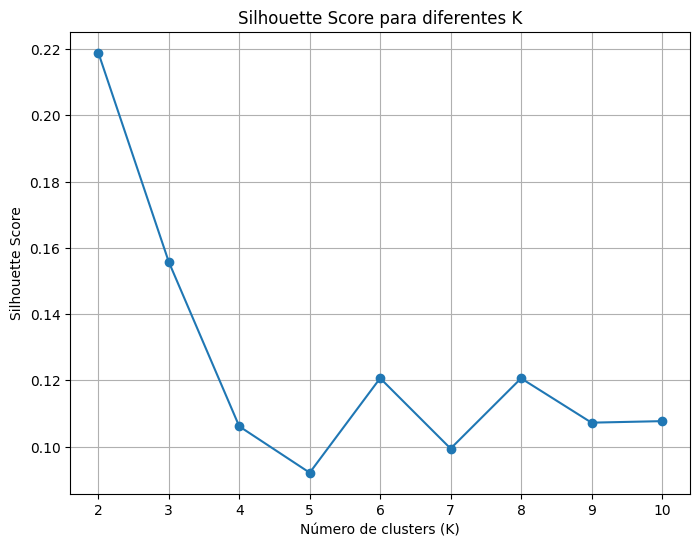

In [188]:
#Evaluamos los distintos K usando Silhouette
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

#Graficamos los resultados
plt.figure(figsize=(8,6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score para diferentes K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [189]:
i = 0
for k in k_values:
    print("Para K igual", k, "el silhouette score es", silhouette_scores[i])
    i += 1

Para K igual 2 el silhouette score es 0.21891508972147788
Para K igual 3 el silhouette score es 0.15574768710331166
Para K igual 4 el silhouette score es 0.10610248137938952
Para K igual 5 el silhouette score es 0.09209589842909457
Para K igual 6 el silhouette score es 0.12064076852911798
Para K igual 7 el silhouette score es 0.09938390862805602
Para K igual 8 el silhouette score es 0.1206038876194662
Para K igual 9 el silhouette score es 0.10721182972373795
Para K igual 10 el silhouette score es 0.10767080470513452


Viendo los resultados, quitamos el K = 10 como columna del Dataset y agregamos K = 6

In [190]:
#Aplicamos KMeans con K=6
kmeans6 = KMeans(n_clusters=6, random_state=42)
clusters6 = kmeans6.fit_predict(data_scaled)

#Agregamos el cluster de K=6 como nueva columna al dataset
data['cluster_k=6'] = clusters6

#Eliminamos el cluster de K=10 del Dataset
data = data.drop(columns=['cluster_k=10'])

Observamos que el valor más alto del Silhouette Score se alcanza con K = 2, lo cual sugiere que dividir los datos en 2 grupos resulta en la mejor separación y cohesión entre clusters. Aunque K = 6 y K = 8 también muestran valores relativamente buenos, ninguno supera la calidad del agrupamiento con K = 2.


NOTA: a lo mejor en vez de hacerlo con k=4 lo podemos hacer con 6 el grafico ya que da mejor score, luego lo vemos bien

Tambien habria que ver xq corno 2 clusteres da el mejor resultado, medio raro viendo que el metodo del codo dice otra cosa

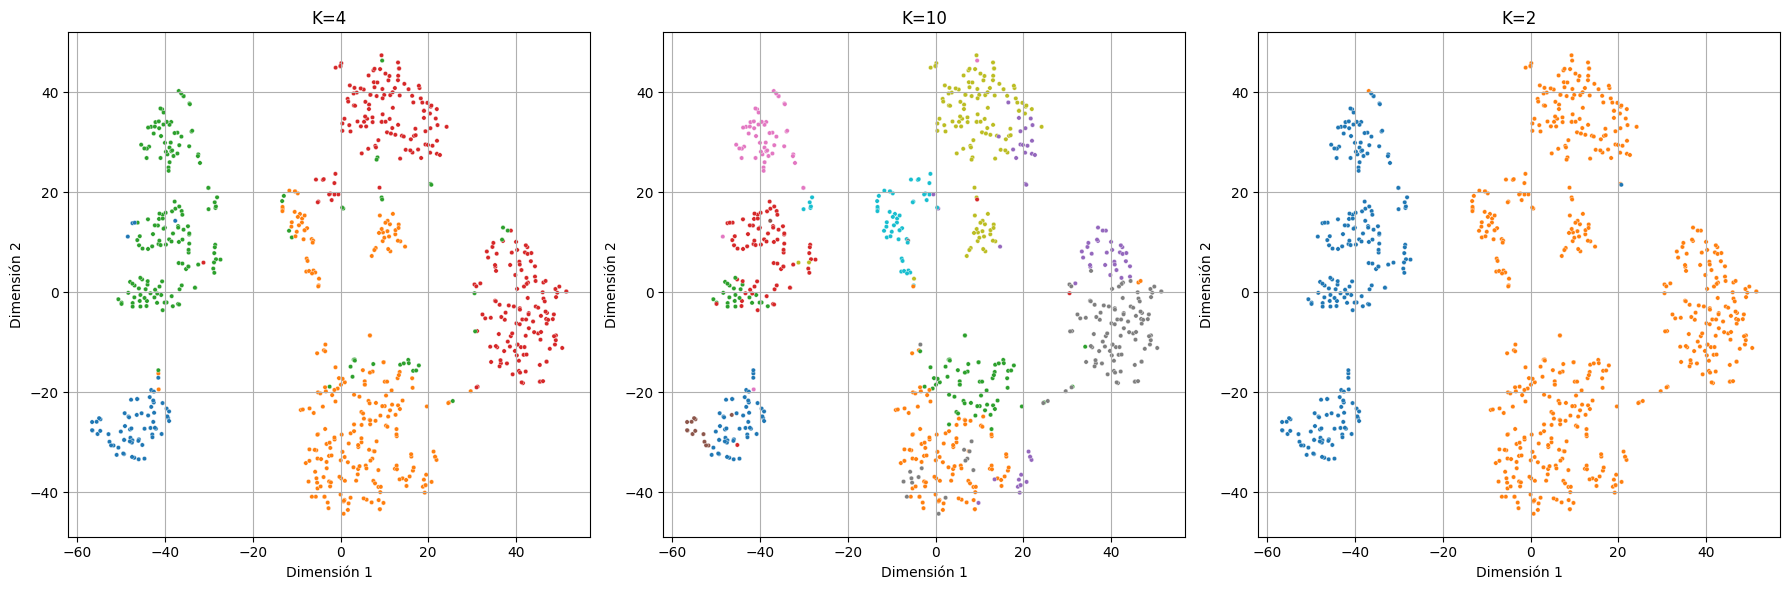

In [191]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

#Pipeline de t-SNE sobre "data"
tsne = make_pipeline(StandardScaler(), TSNE(n_components=2, perplexity=15, random_state=42))
data_tsne = tsne.fit_transform(data)

#Configuramos la figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas, tamaño grande

#Listas para facilitar el loop
clusters_list = [clusters1, clusters2, clusters3]
titles = ["K=4", "K=10", "K=2"]

#Hacemos el gráfico para cada clustering
for i in range(3):
    sns.scatterplot(
        ax=axes[i],
        x=data_tsne[:,0],
        y=data_tsne[:,1],
        hue=clusters_list[i],
        palette="tab10",
        s=10,
        legend=False  #Sacamos la leyenda para que no tape
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Dimensión 1")
    axes[i].set_ylabel("Dimensión 2")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### K = 4

Primero analizamos el promedio de las características.

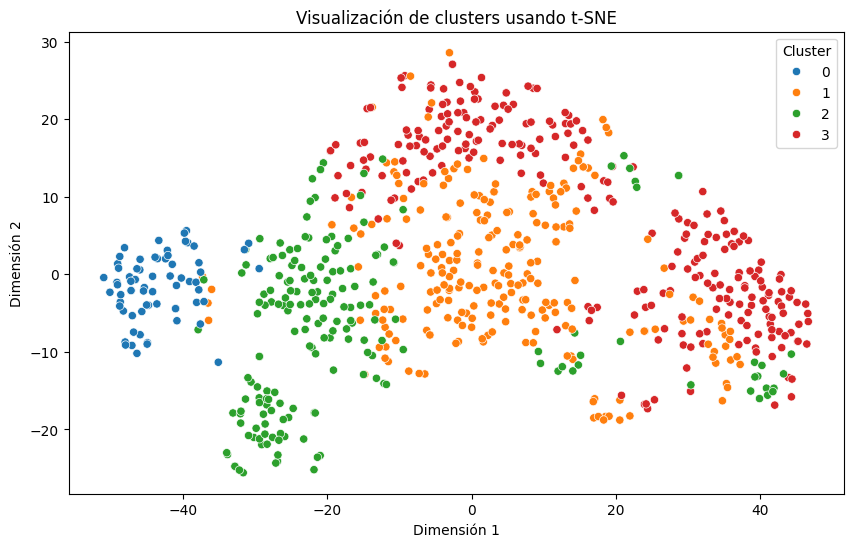

In [204]:
#Observamos con t-SNE la representación (2D) de cada cluster

#Aplicamos t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

#Graficamos los clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=data['cluster_k=4'], palette='tab10')
plt.title('Visualización de clusters usando t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()

In [192]:
#Agrupamos las canciones por el cluster y calculamos las estadísticas
agrupacion_cluster_k_4 = data.groupby('cluster_k=4').mean()
agrupacion_cluster_k_4 = agrupacion_cluster_k_4.drop(columns=['cluster_k=6', 'cluster_k=2'])

#Convertimos el DataFrame a una tabla linda con tabulate
print(tabulate(agrupacion_cluster_k_4, headers='keys', tablefmt='fancy_grid', showindex=True))

╒═══════════════╤════════════════╤════════════════╤════════════╤══════════╤════════════════════╤═════════╤════════════╤════════════╤══════════╤═══════════════╤═════════╤══════════════════╤═══════════╕
│   cluster_k=4 │   acousticness │   danceability │   duration │   energy │   instrumentalness │     key │   liveness │   loudness │     mode │   speechiness │   tempo │   time_signature │   valence │
╞═══════════════╪════════════════╪════════════════╪════════════╪══════════╪════════════════════╪═════════╪════════════╪════════════╪══════════╪═══════════════╪═════════╪══════════════════╪═══════════╡
│             0 │       0.878532 │       0.456603 │     263323 │ 0.210473 │          0.73869   │ 5.01471 │   0.120978 │  -18.5685  │ 0.691176 │     0.0461426 │ 108.806 │          3.88235 │  0.344721 │
├───────────────┼────────────────┼────────────────┼────────────┼──────────┼────────────────────┼─────────┼────────────┼────────────┼──────────┼───────────────┼─────────┼──────────────────┼────────

**CLUSTER 0**

Notamos que se destaca por su alta acousticness (0.87) y por su elevada duration (263323 ms, que corresponde a 4.3887 minutos) e instrumentalness (0.73). Por otro lado, tiene la menor loudness (-18.56), speechiness (0.04) y danceability (0.45).

Estos valores parecieran indicar que agrupó la música por una mayormente instrumental, sin demasiadas vocales y "tranquila" (poco loudness), que no es muy bailable. Creemos que agrupó por música clásica o quizás música ambiental/de fondo, como la que uno puede ponerse para relajarse y trabajar o estudiar.

Por ejemplo, es muy común que algunos estudiantes se pongan música clásica de fondo para ser más productivos, ya que no se distraen con los lyrics ni bailando. Fue una tendencia hace un tiempo. [Video de ejemplo](https://www.youtube.com/watch?v=AawLM81gIHo).

**CLUSTER 1**

Este cluster posee la mayor energy (0.7376), liveness (0.24), tempo (127.014), loudness (-6.129), mode (0.8760). Además, tiene la segunda mayor time_signature (3.99) y valence (0.5599).
Se destaca también por tener la menor duration (211817 ms, que equivale a 3.5303 minutos) y la menor key (2.016). Su instrumentalness es baja pero no la menor (0.0635846).

Teniendo en cuenta toda esta información, podemos notar que agrupó por canciones enérgicas y vívidas, ruidosas y con alto BPM (beats por minuto, cuantos más beats más rápido va y es más energizante). La baja instrumentalness indica una base simple, sencilla y pegadiza. Y la duración indica canciones cortas o de duración estándar para lo que conocemos. Todo esto indica que agrupó por canciones Pop, con mucha más voz y lyrics que instrumento y que son pegadizas y bailables. Además, en general, la duración de las canciones Pop es similar a lo que tenemos como dato. [Video de ejemplo](https://www.youtube.com/watch?v=1RKqOmSkGgM).

**CLUSTER 2**

En este cluster se agrupó por valores medios, quizás destacándose por tener la segunda mayor acousticness (0.67) y la segunda menor energy (0.35), speechiness (0.065) y valence (0.37). También por tener la menor instrumentalness (0.0209).

Por lo tanto podemos concluir que agrupó por canciones con alta acústica, pero tampoco demasiada. Con canciones suaves, con baja energía y más voz que instrumental. Además, por su valence, tienden a ser canciones más melancólicas o tristes. Concluimos que agrupó por canciones que quizás son indie o un Pop más tranquiolo, quizás con influencia del jazz. [Video de ejemplo](https://www.youtube.com/watch?v=Yq6qkq_TWAM).


**CLUSTER 3**

Es el que posee la mayor speechiness (0.14) y valence (0.56). También el segundo mayor tempo (120.446) y la segunda mayor liveness (0.19), loudness (-6.17251) y energy (0.7343). Por otro lado es el que posee menor acousticness (0.15) y danceability (0.67) y la segunda menor instrumentalness (0.02231).

Podemos concluir que agrupó a canciones casi sin acústica, lo que podría ser más producidas computacionalmente (electrónicas) y que son muy bailables por los beats y su alta energía, además de por el ritmo ágil que aporta valence(alto BPM). Como hay baja instumentalness, predominan las voces y por el valence y loudness parecieran ser canciones que transmiten energías positivas o entusiasmo. Entonces consideramos que agrupó por canciones del estilo modernas y enérgicas, con ritmos vailables y poco instrumento, así que podría haber agrupado por Hiphop, Pop e incluso Reggaetón. [Video de ejemplo](https://)

| Variable           | Descripción |
|--------------------|-------------|
| `acousticness`     | Medida de confianza sobre si la pista es acústica. Valores entre 0.0 y 1.0. |
| `danceability`     | Qué tan adecuada es la pista para bailar, según su ritmo, tempo, estabilidad, etc. |
| `duration`     | Duración de la pista en milisegundos. |
| `energy`           | Nivel de intensidad y actividad percibida en la pista. Entre 0.0 y 1.0. |
| `instrumentalness` | Predice si la pista no tiene voces. Valores cercanos a 1.0 indican que es instrumental. |
| `key`              | Tono en el que está la canción, como número entero (por ejemplo, 0 = C, 1 = C#/Db, etc.). -1 si no se detecta. |
| `liveness`         | Estima si hay presencia de público. Valores altos indican que puede ser una grabación en vivo. |
| `loudness`         | Volumen promedio de la pista en decibelios (dB). Normalmente valores negativos. |
| `mode`             | Modalidad de la escala: 1 es mayor, 0 es menor. |
| `speechiness`      | Mide la presencia de palabras habladas. Más cerca de 1.0 = más hablada. |
| `tempo`            | Tempo estimado de la pista en BPM (pulsos por minuto). |
| `time_signature`   | Número estimado de tiempos por compás. |
| `valence`          | Qué tan positiva o alegre suena la pista. Valores altos = más feliz. |


#### K = 2

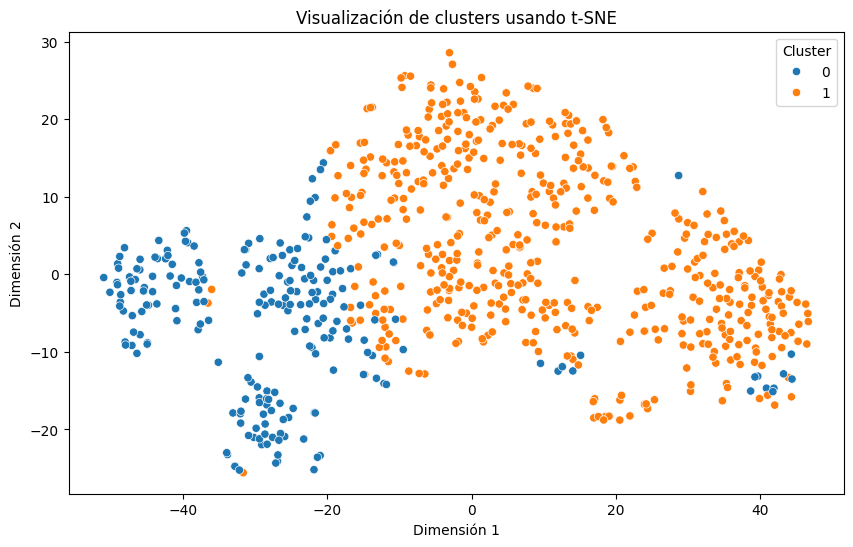

In [206]:
#Observamos con t-SNE la representación (2D) de cada cluster

#Aplicamos t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

#Graficamos los clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=data['cluster_k=2'], palette='tab10')
plt.title('Visualización de clusters usando t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()

In [207]:
#Agrupamos las canciones por el cluster k=2 y calculamos las estadísticas
agrupacion_cluster_k_2 = data.groupby('cluster_k=2').mean()
agrupacion_cluster_k_2 = agrupacion_cluster_k_2.drop(columns=['cluster_k=4', 'cluster_k=6'])

#Convertimos el DataFrame a una tabla linda con tabulate
print(tabulate(agrupacion_cluster_k_2, headers='keys', tablefmt='fancy_grid', showindex=True))

╒═══════════════╤════════════════╤════════════════╤════════════╤══════════╤════════════════════╤═════════╤════════════╤════════════╤══════════╤═══════════════╤═════════╤══════════════════╤═══════════╕
│   cluster_k=2 │   acousticness │   danceability │   duration │   energy │   instrumentalness │     key │   liveness │   loudness │     mode │   speechiness │   tempo │   time_signature │   valence │
╞═══════════════╪════════════════╪════════════════╪════════════╪══════════╪════════════════════╪═════════╪════════════╪════════════╪══════════╪═══════════════╪═════════╪══════════════════╪═══════════╡
│             0 │       0.759425 │       0.466929 │     232094 │ 0.29864  │           0.247272 │ 4.36444 │   0.154536 │  -13.6362  │ 0.826667 │     0.0500853 │ 112.451 │          3.69778 │  0.366999 │
├───────────────┼────────────────┼────────────────┼────────────┼──────────┼────────────────────┼─────────┼────────────┼────────────┼──────────┼───────────────┼─────────┼──────────────────┼────────

#### K = 6

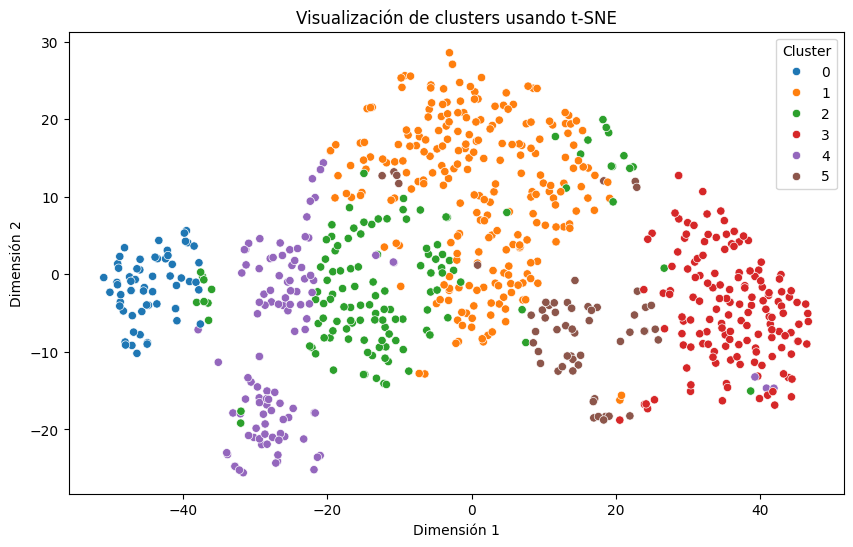

In [209]:
#Observamos con t-SNE la representación (2D) de cada cluster

#Aplicamos t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

#Graficamos los clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=data['cluster_k=6'], palette='tab10')
plt.title('Visualización de clusters usando t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()

In [208]:
#Agrupamos las canciones por el cluster k=6 y calculamos las estadísticas
agrupacion_cluster_k_6 = data.groupby('cluster_k=6').mean()
agrupacion_cluster_k_6 = agrupacion_cluster_k_6.drop(columns=['cluster_k=4', 'cluster_k=2'])

#Convertimos el DataFrame a una tabla linda con tabulate
print(tabulate(agrupacion_cluster_k_6, headers='keys', tablefmt='fancy_grid', showindex=True))

╒═══════════════╤════════════════╤════════════════╤════════════╤══════════╤════════════════════╤═════════╤════════════╤════════════╤══════════╤═══════════════╤═════════╤══════════════════╤═══════════╕
│   cluster_k=6 │   acousticness │   danceability │   duration │   energy │   instrumentalness │     key │   liveness │   loudness │     mode │   speechiness │   tempo │   time_signature │   valence │
╞═══════════════╪════════════════╪════════════════╪════════════╪══════════╪════════════════════╪═════════╪════════════╪════════════╪══════════╪═══════════════╪═════════╪══════════════════╪═══════════╡
│             0 │       0.885889 │       0.462279 │     268641 │ 0.205519 │          0.77893   │ 5.09836 │   0.116408 │  -18.5269  │ 0.688525 │     0.0454426 │ 106.411 │          3.88525 │  0.34369  │
├───────────────┼────────────────┼────────────────┼────────────┼──────────┼────────────────────┼─────────┼────────────┼────────────┼──────────┼───────────────┼─────────┼──────────────────┼────────